In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.1641 - loss: 1.8718
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1779 - loss: 1.7848 - val_accuracy: 0.2285 - val_loss: 1.6053
Epoch 2/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2188 - loss: 1.6503
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 1.6273 - val_accuracy: 0.4127 - val_loss: 1.5380
Epoch 3/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2891 - loss: 1.5736
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.5662 - val_accuracy: 0.5125 - val_loss: 1.4891
Epoch 4/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 1.5204
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
3

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9236 - loss: 0.2872


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[9.8801631e-01 1.1334022e-02 1.4262293e-04 2.4351171e-04 2.6363059e-04]
0


# 混同行列

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


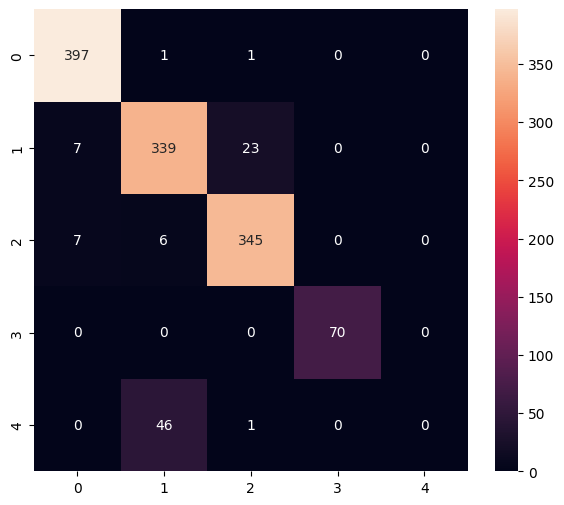

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       399
           1       0.86      0.92      0.89       369
           2       0.93      0.96      0.95       358
           3       1.00      1.00      1.00        70
           4       0.00      0.00      0.00        47

    accuracy                           0.93      1243
   macro avg       0.75      0.78      0.76      1243
weighted avg       0.89      0.93      0.91      1243



/Users/martin/OpenCV/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/martin/OpenCV/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/martin/OpenCV/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/7q/h3wvdg41079dwnz_2247pbh40000gn/T/tmpkk2owob9/assets


INFO:tensorflow:Assets written to: /var/folders/7q/h3wvdg41079dwnz_2247pbh40000gn/T/tmpkk2owob9/assets


Saved artifact at '/var/folders/7q/h3wvdg41079dwnz_2247pbh40000gn/T/tmpkk2owob9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  13362095568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13362091536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13362098256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13362098448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13380819792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13380819216: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1725237928.390975  443080 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1725237928.390988  443080 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


6580

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.19 ms, sys: 111 μs, total: 1.3 ms
Wall time: 257 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8801631e-01 1.1334016e-02 1.4262291e-04 2.4351101e-04 2.6363035e-04]
0
